<a href="https://colab.research.google.com/github/ReynaraEzra/NLP-Tensorflow/blob/main/Project_Time_Series_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Time Series Data Using Tensorflow**
## **Reynara Ezra Pratama**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 221 µs (started: 2021-07-02 03:40:04 +00:00)


# **Get Data**

In [3]:
path = '/content/city_temperature.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


time: 2.03 s (started: 2021-07-02 03:40:04 +00:00)


# **Check Data**

In [4]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


time: 25.6 ms (started: 2021-07-02 03:40:06 +00:00)


# **Create New Dataframe for Jakarta**

In [5]:
df_new = df[df['City'] == 'Jakarta']

time: 160 ms (started: 2021-07-02 03:40:06 +00:00)


In [6]:
df_new.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
349586,Asia,Indonesia,NaN,Jakarta,1,1,1995,85.0
349587,Asia,Indonesia,NaN,Jakarta,1,2,1995,82.3
349588,Asia,Indonesia,NaN,Jakarta,1,3,1995,81.7
349589,Asia,Indonesia,NaN,Jakarta,1,4,1995,83.1
349590,Asia,Indonesia,NaN,Jakarta,1,5,1995,80.6


time: 21.5 ms (started: 2021-07-02 03:40:06 +00:00)


In [7]:
date = df_new[['Year', 'Month', 'Day']]
date.head()

,Year,Month,Day
349586,1995,1,1
349587,1995,1,2
349588,1995,1,3
349589,1995,1,4
349590,1995,1,5


time: 18.1 ms (started: 2021-07-02 03:40:06 +00:00)


In [8]:
df_new['Date'] = pd.to_datetime(date)

time: 24.2 ms (started: 2021-07-02 03:40:06 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_new

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
349586,Asia,Indonesia,NaN,Jakarta,1,1,1995,85.0,1995-01-01
349587,Asia,Indonesia,NaN,Jakarta,1,2,1995,82.3,1995-01-02
349588,Asia,Indonesia,NaN,Jakarta,1,3,1995,81.7,1995-01-03
349589,Asia,Indonesia,NaN,Jakarta,1,4,1995,83.1,1995-01-04
349590,Asia,Indonesia,NaN,Jakarta,1,5,1995,80.6,1995-01-05
...,...,...,...,...,...,...,...,...,...
358846,Asia,Indonesia,NaN,Jakarta,5,8,2020,86.0,2020-05-08
358847,Asia,Indonesia,NaN,Jakarta,5,9,2020,83.0,2020-05-09
358848,Asia,Indonesia,NaN,Jakarta,5,10,2020,84.4,2020-05-10
358849,Asia,Indonesia,NaN,Jakarta,5,11,2020,85.3,2020-05-11


time: 35.1 ms (started: 2021-07-02 03:40:07 +00:00)


In [10]:
df_new.set_index('Date')

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,Asia,Indonesia,NaN,Jakarta,1,1,1995,85.0
1995-01-02,Asia,Indonesia,NaN,Jakarta,1,2,1995,82.3
1995-01-03,Asia,Indonesia,NaN,Jakarta,1,3,1995,81.7
1995-01-04,Asia,Indonesia,NaN,Jakarta,1,4,1995,83.1
1995-01-05,Asia,Indonesia,NaN,Jakarta,1,5,1995,80.6
...,...,...,...,...,...,...,...,...
2020-05-08,Asia,Indonesia,NaN,Jakarta,5,8,2020,86.0
2020-05-09,Asia,Indonesia,NaN,Jakarta,5,9,2020,83.0
2020-05-10,Asia,Indonesia,NaN,Jakarta,5,10,2020,84.4


time: 34.8 ms (started: 2021-07-02 03:40:07 +00:00)


In [11]:
df_new = df_new.loc[(df_new['Date'] >= '1995-01-01') & (df_new['Date'] < '2020-01-01'), ['Date', 'AvgTemperature']]

time: 7.85 ms (started: 2021-07-02 03:40:07 +00:00)


In [12]:
df_new = df_new.reset_index()

time: 3.28 ms (started: 2021-07-02 03:40:07 +00:00)


In [13]:
df_new = df_new.drop('index', axis=1)

time: 3.47 ms (started: 2021-07-02 03:40:07 +00:00)


In [14]:
df_new

,Date,AvgTemperature
0,1995-01-01,85.0
1,1995-01-02,82.3
2,1995-01-03,81.7
3,1995-01-04,83.1
4,1995-01-05,80.6
...,...,...
9127,2019-12-27,80.6
9128,2019-12-28,82.0
9129,2019-12-29,81.4
9130,2019-12-30,84.6


time: 27.2 ms (started: 2021-07-02 03:40:07 +00:00)


In [15]:
df_new.describe()

,AvgTemperature
count,9132.000000
mean,35.301051
std,80.373306
min,-99.000000
25%,-99.000000
50%,82.600000
75%,84.400000
max,90.600000


time: 17.8 ms (started: 2021-07-02 03:40:07 +00:00)


In [16]:
df_new['AvgTemperature'].replace(-99, np.nan, inplace=True)

time: 4.11 ms (started: 2021-07-02 03:40:07 +00:00)


In [17]:
df_new['AvgTemperature'].ffill(inplace=True)

time: 2.64 ms (started: 2021-07-02 03:40:07 +00:00)


In [18]:
df_new.describe()

,AvgTemperature
count,9132.000000
mean,83.390823
std,2.280455
min,71.300000
25%,82.000000
50%,83.700000
75%,85.000000
max,90.600000


time: 22.1 ms (started: 2021-07-02 03:40:07 +00:00)


In [19]:
df_new.isnull().sum()

Date              0
AvgTemperature    0
dtype: int64

time: 16.7 ms (started: 2021-07-02 03:40:07 +00:00)


# **Plot Data**

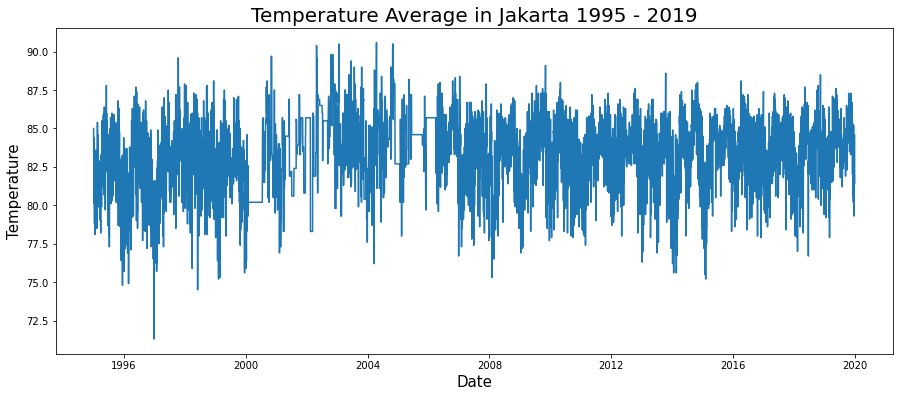

time: 379 ms (started: 2021-07-02 03:40:07 +00:00)


In [20]:
import matplotlib.pyplot as plt

dates = df_new['Date'].values
temp = df_new['AvgTemperature'].values

plt.figure(figsize=(15,6))

plt.plot(dates, temp)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.title('Temperature Average in Jakarta 1995 - 2019', fontsize=20)
plt.show()

In [21]:
final = df_new.set_index('Date')
final.head()

,AvgTemperature
Date,
1995-01-01,85.0
1995-01-02,82.3
1995-01-03,81.7
1995-01-04,83.1
1995-01-05,80.6


time: 18.8 ms (started: 2021-07-02 03:40:07 +00:00)


# **Split Data**

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final.values, test_size=0.2, shuffle=False)

time: 247 ms (started: 2021-07-02 03:40:07 +00:00)


# **Scale Data**

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

length = len(final)

border = int((1-0.2)*length)

date_train = final.index[:border]
date_test = final.index[border:]

time: 6.49 ms (started: 2021-07-02 03:40:07 +00:00)


In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

window = 25
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=window, batch_size=25)
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=window, batch_size=1)

time: 3.96 ms (started: 2021-07-02 03:40:07 +00:00)


# **Callback**

In [27]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="mae",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

time: 4.17 ms (started: 2021-07-02 03:42:52 +00:00)


# **Model**

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, input_shape=(window, 1)),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1),
])

time: 570 ms (started: 2021-07-02 03:40:08 +00:00)


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 45,781
Trainable params: 45,781
Non-trainable params: 0
_________________________________________________________________
time: 3.36 ms (started: 2021-07-02 03:41:59 +00:00)


# **Run Model**

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss='Huber',
              optimizer=optimizer,
              metrics=["mae"])

time: 17.4 ms (started: 2021-07-02 03:43:06 +00:00)


In [29]:
history = model.fit(
    train_generator,
    epochs = 20, 
    callbacks = [reduce_LR, stop_early],
    verbose = 1
)

Epoch 1/20
292/292 [==============================] - 11s 25ms/step - loss: 0.0859 - mae: 0.3773
Epoch 2/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0151 - mae: 0.1443
Epoch 3/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0089 - mae: 0.1065
Epoch 4/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0086 - mae: 0.1045
Epoch 5/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0084 - mae: 0.1038
Epoch 6/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0084 - mae: 0.1034
Epoch 7/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0082 - mae: 0.1025
Epoch 8/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0082 - mae: 0.1021
Epoch 9/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0081 - mae: 0.1015
Epoch 10/20
292/292 [==============================] - 7s 25ms/step - loss: 0.0079 - mae: 0.0998
Epoch 11/20
292/292 [=================